<center><h1> THEME 2 - Calculs avec Numpy </h1></center>

### Objectifs

- Effectuer des calculs vectoriels et matriciels avec le module Numpy
- Utiliser diverses fonctions disponibles pour résoudre des problèmes en GCH incluant des systèmes d'équations linéaires

### Notions 

- [Exemple 1](#ex1): Indexation de vecteurs, opérations par vectorisation, masques binaires
- [Exemple 2](#ex2): Indexation de matrices, opérations matricielles, résolution de systèmes linéaires
- [Exemple 3](#ex3): Construction de matrices par vectorisation
- [Exemple 4](#ex4): Manipulations plus avancées

### Terminologie:

- `ndarray` correspond à un tenseur numpy de dimension n. 

### Référence

- [Documentation Numpy](https://numpy.org/doc/stable/reference/)

---

<center><h2 id='ex1'> Exemple 1 - Loi d'Arrhenius </h2></center>

### 📝 Contexte
En cinétique chimique, la loi d'Arrhenius permet de décrire la variation de la vitesse d'une réaction chimique en fonction de la température en suvant la relation suivante: 

$$
\begin{aligned}
k=A \cdot \mathrm{e}^{\frac{-E_{A}}{R T}}
\end{aligned}
$$

- $k$, coefficient de vitesse de la réaction
- $A$, facteur pré-exponentiel
- $T$, température en K
- $R$, constante des gazs parfaits
- $E_{A}$, énergie d'activation

### ⭐ Objectif

Calculer la vitesse d'une réaction chimique $k$ pour huit (8) températures différentes allant de 300 à 1000 K.

### 💻 Code

On commence par importer la librairie numpy et d'initialiser les constantes du problème.

In [2]:
import numpy as np
import matplotlib.pyplot as plt # Sera vu plus en détail dans le thème 3

A = 9.0 #(1/s)
R = 8.314 #(kPa.L/mol.K)
E_A = 200 #(kJ/mol)

vec_T = np.array([300, 400, 500, 600, 700, 800, 900, 1000])	# Creation manuelle du vecteur de températures

Pour discretiser T automatiquement, on a le choix entre:
- `np.arange(debut, fin, pas)`: génère les points si l'on veut un $\delta T$ spécifique en indiquant le pas
- `np.linspace(debut, fin, nb de points)`: génère le nombre de points voulus espacés linéairement

Ces fonctions retournent un vecteur des valeurs. 

In [31]:
vec_T = np.linspace(300,1000,8) # Discrétisation linéaire de 8 points entre 300 et 1000 K
print('Le vecteur de température vec_T est: ', vec_T)

print(vec_T[2]) # Affiche le 3e élément de T puisque l'indexation commence toujours à 0 et termine à 7 dans ce cas-ci
print(vec_T[-1]) # Affiche le dernier élément de T
print(vec_T[:2]) # Affiche les 2 premiers éléments de T, soit du début à l'indice 1, l'indice 2 étant exclu puisqu'il indique la fin
print(vec_T[6:]) # Affiche les 2 derniers éléments de T, soit de l'indice 6 à la fin
print(vec_T[5:-1]) # Affiche les valeurs entre l'indice 5 et le dernier élement du vecteur tout en excluant ce dernier
print(vec_T[0:6:2]) # Affiche les éléments de T allant de l'indice 0 à l'indice 5, l'indice 6 étant exclu puisqu'il indique la fin, avec des bonds de 2 sur les indices

Le vecteur de température vec_T est:  [ 300.  400.  500.  600.  700.  800.  900. 1000.]
500.0
1000.0
[300. 400.]
[ 900. 1000.]
[800. 900.]
[300. 500. 700.]


Pour calculer les valeurs de $k$ à chacunes de ces températures, plutôt que d'utiliser une boucle `for` pour passer à travers les valeurs de T, il est mieux d'utiliser les capacités de **vectorisaton** de Numpy pour effectuer les opérations directement avec le vecteur T. 

- Un vecteur multiplié, divisé ou élevé à la puissance par un scalaire va effectuer l'opération sur chacun de ses éléments. 
- 2 vecteurs peuvent subir toutes les opérations mathématiques entre eux tant que leurs dimensions sont égales. 

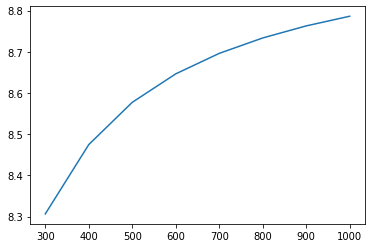

8


In [27]:
vec_k = A*np.exp(-E_A/(R*vec_T)) # np.exp retourne la valeur de l'exponentielle

plt.plot(vec_T, vec_k)
plt.show()

# Puisque le calcul est effectué sur 101 points, le vecteur k contient 101 éléments
print(vec_k.size) # k.size ou len(k) retourne le nombre d'élements du vecteur


Les expressions booléennes de numpy permettent d'exprimer des conditions qui vont être évaluées pour chaque élément du vecteur et retourner un `True` ou `False` pour chaque valeur. 

In [72]:
np.random.seed(0)
vec_k_rand = np.random.choice(vec_k,10) # Choisit 10 éléments aléatoirement du vecteur k

print(vec_k_rand)
print(vec_k_rand > 8.5) # Vecteur booléen qui retourne True pour les éléments de k supérieurs à 8.5
print(~(vec_k_rand < 8.7)) # ~ inverse le booléen
print((vec_k_rand > 8.5) & (vec_k_rand < 8.7)) # & = ET, | = OU
print(vec_k_rand[(vec_k_rand < 8.7)]) # Retourne un vecteur des valeurs de k inférieures à 8.7
print((vec_k_rand < 8.7).nonzero()[0]) # Retourne un vecteur des indices des valeurs de k inférieures à 8.7



[8.69596509 8.78608103 8.73340052 8.3065017  8.64630067 8.64630067
 8.64630067 8.78608103 8.4746983  8.64630067]
[ True  True  True False  True  True  True  True False  True]
[False  True  True False False False False  True False False]
[ True False False False  True  True  True False False  True]
[8.69596509 8.3065017  8.64630067 8.64630067 8.64630067 8.4746983
 8.64630067]
[0 3 4 5 6 8 9]


### 💡 Astuces
- Quand on utilise des vecteurs, il est important de faire attention que les unités soient consistantes, c'est à dire éviter de multiplier un vecteur d'entiers par un vecteur de décimaux.
- Il est courant d'avoir l'erreur: `IndexError` au début, cela veut très souvent dire que le vecteur a été indexé avec une valeur plus grande que sa taille. Par exemple, le dernier indice d'un vecteur correspond toujours à **un de moins** que la longueur du même vecteur évalué avec `len`.

---

<center><h2 id='ex2'> Exemple 2 - Combustion d’un mélange gazeux </h2></center>

### 📝 Contexte

Un mélange gazeux composé de méthane, d’éthane et de propane est brûlé dans une fournaise avec de l’air en excès. Les débits molaires des gaz de combustion à la sortie de la fournaise sont connus.

Les trois réactions se déroulant dans la fournaise sont les suivantes :

$$
\begin{gathered}
\mathrm{CH}_{4}+2 \mathrm{O}_{2} \rightarrow \mathrm{CO}_{2}+2 \mathrm{H}_{2} \mathrm{O} \\
\mathrm{C}_{2} \mathrm{H}_{6}+3.5 \mathrm{O}_{2} \rightarrow 2 \mathrm{CO}_{2}+3 \mathrm{H}_{2} \mathrm{O} \\
\mathrm{C}_{3} \mathrm{H}_{8}+5 \mathrm{O}_{2} \rightarrow 3 \mathrm{CO}_{2}+4 \mathrm{H}_{2} \mathrm{O}
\end{gathered}
$$

Le débit à l'entrée du méthane est connu.
$$
\begin{align*}
n_{C H 4}=4.12 \mathrm{~mol} / \mathrm{s}
\end{align*}
$$

Connaissant les débits à la sortie de la fournaise, un bilan atomique sur le carbone et un autre sur l'hydrogène entre l'entrée et la sortie ont pu être faits.
$$
\begin{align*}
n_{C H 4}+2 n_{C 2 H 6}+3 n_{C 3 H 8}=6.92
\end{align*}
$$
$$
\begin{align*}
4 n_{C H 4}+6 n_{C 2 H 6}+8 n_{C 3 H 8}=24.48
\end{align*}
$$

### ⭐ Objectif

Trouver les débits d'éthane $n_{C 2 H 6}$ et de propane $n_{C 3 H 8}$ par résolution du système d'équation linéaire sous forme matricielle $An = b$.

### 💻 Code

Dans Numpy, les matrices sont représentées par un vecteur qui contient plusieurs vecteurs qui font office de lignes, autrement dit, un vecteur 2D. L'indexation des matrices dans Numpy est basée sur les lignes, cela veut dire que l'indexation se fait par `[ligne, colonne]`. Sinon, l'indexation fonctionne de la même façon que les vecteurs.  

In [52]:
# Creation matrice des coefficients A
mat_A = np.array([[1,0,0],[1,2,3],[4,6,8]])
print(mat_A)
print(mat_A[1,1]) # Affiche la valeur de la 2ème ligne et de la 2ème colonne
print(mat_A[1:,1]) # Affiche la 2ème colonne à partir de la 2ème ligne
print(mat_A[2,:]) # Affiche la 3ème ligne

# Création du vecteur b
vec_b = np.array([4.12,6.92,24.48])

[[1 0 0]
 [1 2 3]
 [4 6 8]]
2
[2 6]
[4 6 8]


Pour toute opération d'algèbre linéaire, le sous module `np.linalg` contient plein de fonctions utiles telles que `np.linalg.solve` pour résoudre un système $Ax=b$ et `np.linalg.inv` pour inverser une matrice. L'opérateur `@` est utilisé pour la multiplication matricielle. 

In [53]:
vec_n = np.linalg.solve(mat_A,vec_b) # ou np.linalg.inv(mat_A) @ vec_b

print(vec_n) # Affiche le vecteur solution, c'est-à-dire les débits molaire de méthane, d'éthane et de propane à la sortie de la fournaise (mol/s)

[4.12 0.8  0.4 ]


<center><h2 id='ex3'> Exemple 3 - Interpolation Polynomiale</h2></center>

### 📝 Contexte
Lorsque l'on va au laboratoire pour déterminer les propriétés d’un matériau ou la vitesse d’une réaction, nous nous retrouvons avec des données discrètes, c’est à dire des couples de point $xi$ auquel nous associons une mesure (que nous appellerons fonction) $f(xi)$. Le but de l’interpolation sera de trouver un moyen d’évaluer $f(x)$ pour $x \neq xi$. 

L'une de ces méthodes d'interpolation est l'interpolation polynomiale, qui consiste à construire un polynome de degré $n$ si l'on a $n-1$ points de référence. 

$$
\begin{aligned}
p_{n}(x)= \sum_{i = 0}^{n} a_{i} x^{i} = a_{0}+a_{1} x+a_{2} x^{2}+a_{3} x^{3}+\ldots+a_{n} x^{n}
\end{aligned}
$$

On trouve les coefficients $a_{n}$ en résolvant le système $Aa = f$ où $A$ est la matrice de Vandermonde:

$$
\begin{align*}
\left[\begin{array}{ccccc}
1 & x_{0} & x_{0}^{2} & \cdots & x_{0}^{n} \\
1 & x_{1} & x_{1}^{2} & \cdots & x_{1}^{n} \\
1 & x_{2} & x_{2}^{2} & \cdots & \vdots \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{n} & x_{n}^{2} & \cdots & x_{n}^{n}
\end{array}\right]\left[\begin{array}{c}
a_{0} \\
a_{1} \\
a_{2} \\
\vdots \\
a_{n}
\end{array}\right]=\left[\begin{array}{c}
f\left(x_{0}\right) \\
f\left(x_{1}\right) \\
f\left(x_{2}\right) \\
\vdots \\
f\left(x_{n}\right)
\end{array}\right]
\end{align*}
$$

### ⭐ Objectif

Évaluer la fonction $\frac{1}{1+25x^2}$ à 5 points espacés régulièrement et construire un polynome d'interpolation (degré 4).

### 💻 Code

Puisque nous avons l'intention d'évaluer la fonction sur une discrétisation de x, il est pratique de la définir dans une fonction qui a pour entrée ce vecteur.

In [55]:
# Définition de 'fn' qui évalue la fonction sur tous le vecteur 'vec_x' donné en paramètre
def fn(vec_x):
    return 1/(1+25*vec_x**2)

n = 5 # Nombre de points utilisés pour l'interpolation
vec_xi = np.linspace(-1,1,n)
vec_yi = fn(vec_xi)

print(vec_xi)

[-1.  -0.5  0.   0.5  1. ]


Il y a plusieurs façons de créer la matrice de Vandermonde. 

Une première approche consiste à constuire la matrice ligne par ligne à l'aide d'une boucle `for` et de remplir cette ieme ligne par le ieme élément du vecteur x succéssivement élevé à une puissance supérieure.

In [57]:
# Créer une matrice de zéros de 5 lignes et 5 colonnes (car degré 4)
mat_vdm = np.zeros((n, n))

# Passer à travers les lignes de la matrice
for i in range(n):
    # Passer à travers les colonnes de la matrice
    for j in range(n):
        # La valeur à la ieme colonne correspond a la valeur élevée à la ieme puissance
        # Par exemple, si j = 0, une puissance nulle donne toujours une valeur de 1
        mat_vdm[i,j] = vec_xi[i] ** j

print(mat_vdm)
    

[[ 1.     -1.      1.     -1.      1.    ]
 [ 1.     -0.5     0.25   -0.125   0.0625]
 [ 1.      0.      0.      0.      0.    ]
 [ 1.      0.5     0.25    0.125   0.0625]
 [ 1.      1.      1.      1.      1.    ]]


Cette approche, tout étant fonctionnelle, ne prend pas avantage des capacités de vectorisation de Numpy. On remarque que la ieme colonne de la matrice de Vandermonde n'est qu'en fait le vecteur des points d'interpolation élevés à la ieme puissance. Une seule boucle `for` en `i` est nécessaire pour constuire la matrice de Vandermonde.

In [58]:
# Passer à travers les colonnes de la matrice
for i in range(n):
    mat_vdm[:,i] = vec_xi**i # Remplire la ième colonne de la matrice par les éléments de vec_x^i

print(mat_vdm)

[[ 1.     -1.      1.     -1.      1.    ]
 [ 1.     -0.5     0.25   -0.125   0.0625]
 [ 1.      0.      0.      0.      0.    ]
 [ 1.      0.5     0.25    0.125   0.0625]
 [ 1.      1.      1.      1.      1.    ]]


Cela a pour double bénéfice d'être plus efficace et plus lisible. 

Enfin, le système est résolu pour trouver les coefficients du polynôme et ce dernier est évalué sur une discrétisation plus fine de x.

[ 1.00000000e+00 -2.22400446e-20 -4.27718833e+00  8.89601783e-19
  3.31564987e+00]


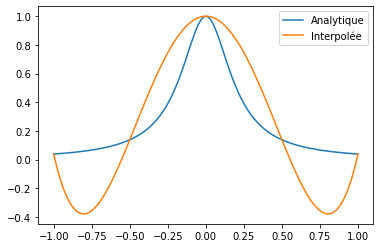

In [60]:
vec_a = np.linalg.inv(mat_vdm) @ vec_yi # Résolution du système
print(vec_a)

vec_x = np.linspace(-1,1,100) # Discrétisation plus fine de x
vec_y_analytique = fn(vec_x) # Évaluation de la fonction analytique

# L'évaluation du polynome interpolateur est faite par la somme des coefficients multipliés par la puissance de x.
# À chaque itération de la boucle, on ajoute la valeur d'un terme évalué sur le vecteur x. 
vec_y_interp = np.zeros(100)
for i in range(n):
    vec_y_interp += vec_a[i]*vec_x**i

# Affichage graphique (vu en détail dans le thème 2)
plt.plot(vec_x, vec_y_analytique, label='Analytique')
plt.plot(vec_x, vec_y_interp, label='Interpolée')
plt.legend()
plt.show()

### 💡 Astuces

- Pour du déboguage, l'utilisation de  `print(A.shape)` affiche la taille de la matrice `A` ce qui peut être utile pour déterminer si une matrice est mal formée.
- Observer la forme des matrices pour voir si elles peuvent être construites directement par un vecteur plutôt que par éléments.

<center><h2 id='ex4'> Exemple 4 - Floutage 2D </h2></center>

### 📝 Contexte

L'operation de floutage 2D est une opération très utile dans une variété de domaines et agit comme un filtre passe-bas pour réduire le bruit d'une image ou de données expérimentales. Cet exemple porte sur le floutage d'une image *grayscale* afin de faciliter la compréhension de l'algorithme. 

L'algorithme consiste à remplacer la valeur de chaque pixel de l'image par une nouvelle valeur calculée en faisant une somme pondérée des ses pixels voisins. Les coefficients de cette somme pondérée sont spécifiés dans une matrice de convolution. 
<center>
  <img src="https://raw.githubusercontent.com/gch-faps/faps-python/main/theme2/assets/blur_kernel.png" />
</center>

La matrice de convolution que l'on va utiliser est une matrice de convolution gaussienne 3x3. La nouvelle valeur du pixel est la somme de son ancienne valeur multipliée par $\frac{1}{4}$, des 4 pixels voisins par $\frac{1}{8}$ et des 4 pixels diagonaux par $\frac{1}{16}$.

Pour des raisons de complexité, plutôt que d'effectuer une convolution, l'opération sera réduite à la multiplication entre une grande matrice des coefficients de Gauss $A$ et un vecteur $\vec{p}$ contenant tous les pixels de l'image, réduisant le problème à une seule dimension (1D). Avant de faire cela, il faut que l'on passe d'une matrice de pixels à un vecteur et comprendre la numérotation qui en découle.

<center>
  <img width=300px src="https://raw.githubusercontent.com/gch-faps/faps-python/main/theme2/assets/ex3_0.svg">
</center>

En prenant $n_{x}$ comme le nombre de pixels sur $x$ de l'image (ici 4), la fonction $C(x,y)$ permettant de transformer les coordonnées 2D en indice vectoriel 1D est: $C(x,y) = x + n_{x}*y$. Par exemple, la coordonnée 1D du pixel $(x,y) = (1,1)$ correspond à $C(1,1) = 1+4*1 = 5$. Comme il est possible de remarquer sur la figure ci-dessous, l'indice 5 se trouve bel et bien à la position $(1,1)$. Ainsi, grâce à cette équation, on peut déterminer les points voisins et diagonaux en 1D et construire notre matrice gaussienne avec les bons coefficients.

<center>
  <img width=300px src="https://raw.githubusercontent.com/gch-faps/faps-python/main/theme2/assets/ex3_1.svg" />
</center>

Pour flouter un pixel, sa nouvelle valeur devient:

$$
\begin{aligned}
2D &: p(x,y) = \frac{1}{16} \left[ 4p(x,y)+2(p(x+1,y) + p(x-1,y) + p(x,y-1) + p(x,y+1)) + p(x-1,y+1) + p(x+1,y+1) + p(x-1,y-1) + p(x+1,y-1) \right] \\
1D &: p(i) = \frac{1}{16} \left[ 4p(i)+2(p(i+1) + p(i-1) + p(i+n_{x}) + p(i-n_{x})) + p(i+n_{x}-1) + p(i+n_{x}-1) + p(i-n_{x}-1) + p(i-n_{x}+1) \right]
\end{aligned}
$$

Les pixels qui forment le contour de l'image ne subissent pas d'altération, le coefficient est donc de 1 sur la diagonale pour les lignes qui correspondent à ces pixels. La matrice creuse $A$ est donc:

<center>
  <img width=500px src="https://raw.githubusercontent.com/gch-faps/faps-python/main/theme2/assets/ex3_2.svg" />
</center>

### ⭐ Objectif

Écrire une fonction qui permet de constuire la matrice $A$ selon les coefficients de Gauss et flouter une image. 



### 💻 Code

La première étape est de trouver les indices des pixels qui ne sont pas sur la bordure de l'image. La solution ici fait appel à `np.reshape()` qui permet de changer la forme du vecteur ou de la matrice tant que le nombre d'élément total ne change pas. Par exemple, un vecteur `vec` de longueur 4, peut être transformé en une matrice 2x2 avec `np.reshape(vec,(2,2))` ou plus simplement `vec.reshape((2,2))`: les deux premiers éléments du vecteurs vont former la premiere ligne et les deux derniers la deuxième ligne. 

La fonction `ndarray.flatten()` ramène un array de dimensions multiple à un vecteur 1D. 

In [66]:
mat_img = np.array([[20,20,80,140],[110,150,200,50],[60,130,70,50]]) # Image de l'énoncé

# L'objectif est d'avoir la numérotation 1D avec la même forme que l'image en 2D
mat_idx = np.arange(0,mat_img.size).reshape(mat_img.shape) # Création d'une matrice de la même taille que l'image à partir d'un vecteur d'éléments de 0 à mat_img.size-1
print(mat_idx)

# On sélectionne tous les éléments à l'exception des bords et on ramène le tout à un vecteur 1D avec .flatten()
vec_idx_center = mat_idx[1:-1,1:-1].flatten()
print(vec_idx_center)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[5 6]


On remarque que la diagonale de la matrice A n'est jamais nulle, alors plutôt qu'initialiser la matrice avec `np.zeros` on peut utiliser `np.eye` ce qui créé une matrice avec une diagonale de 1 (matrice identité).
Il ne reste qu'à remplir les lignes qui correspondent aux pixels qui ne sont pas aux bords de l'image avec les coefficients de Gauss. 

In [67]:
A = 16 * np.eye(mat_img.size, mat_img.size, dtype=np.uint8) # Creation de la matrice A avec des 16 sur la diagonale
nx = mat_img.shape[0] # nx correspond au nombre de pixels sur x

# Les deux vecteurs créés ci-dessous vont contenir les indices des pixels voisins et diagonaux (4 de chaque)
# Numpy permet d'indexer un vecteur avec un autre vecteur ce qui permet de changer les valeurs du coefficient de ces pixels
vec_idx_voisins = np.zeros(4, dtype=np.uint16)
vec_idx_diag = np.zeros(4, dtype=np.uint16)

# Passer à travers chaque ligne des pixels qui ne sont pas sur le bord
for i in vec_idx_center:
    A[i,i] = 4 # Coefficient du pixel même est 4
    vec_idx_voisins[:] = [i+1, i-1, i+nx, i-nx] # Calcul des indices des 4 voisins
    vec_idx_diag[:] = [i-1+nx, i+1+nx, i+1-nx, i-1-nx] # Calcul des indices des 4 voisins diagonaux
    A[i,vec_idx_voisins] = 2 # Coefficient des voisins est 2
    A[i,vec_idx_diag] = 1  # Coefficient des voisins diagonaux est 1

print(A)


[[16  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 16  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 16  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 16  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 16  0  0  0  0  0  0  0]
 [ 0  1  2  1  2  4  2  1  2  1  0  0]
 [ 0  0  1  2  1  2  4  2  1  2  1  0]
 [ 0  0  0  0  0  0  0 16  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 16  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 16  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 16  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 16]]


La matrice A étant constuite, il ne reste qu'à la multiplier avec le vecteur des pixel originaux pour obtenir l'image floutée. On regroupe d'abord l'ensemble du code présenté ci-dessus dans une fonction:

In [68]:
def blur_img(mat_img):
    mat_idx = np.arange(0,mat_img.size).reshape(mat_img.shape)
    vec_idx_center = mat_idx[1:-1,1:-1].flatten()
    A = 16 * np.eye(mat_img.size, mat_img.size, dtype=np.uint16)
    nx = mat_img.shape[0]

    vec_idx_voisins = np.zeros(4, dtype=np.uint16)
    vec_idx_diag = np.zeros(4, dtype=np.uint16)
    for i in vec_idx_center:
        A[i,i] = 4
        vec_idx_voisins[:] = [i+1, i-1, i+nx, i-nx]
        vec_idx_diag[:] = [i-1+nx, i+1+nx, i+1-nx, i-1-nx]
        A[i,vec_idx_voisins] = 2
        A[i,vec_idx_diag] = 1
        
    mat_img_blurred = A @ mat_img.flatten()

    return np.floor_divide(mat_img_blurred,16).reshape(mat_img.shape)
    

On peut maintenant tester la fonction sur une vraie image.

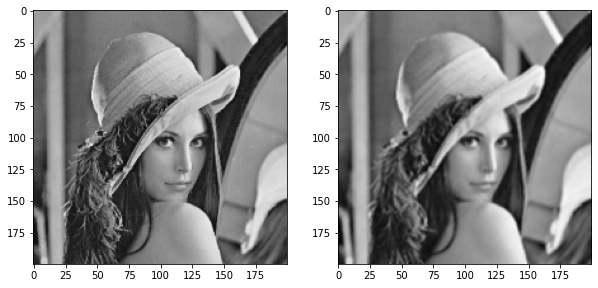

In [69]:
from urllib.request import urlopen
import PIL.Image as Image

url = "https://raw.githubusercontent.com/gch-faps/faps-python/main/theme2/assets/lenna_200.png"
img = Image.open(urlopen(url))
mat_img = np.array(img)[:, :, 0]
mat_img_blurred = blur_img(mat_img)

f, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(mat_img, cmap='gray')
ax[1].imshow(mat_img_blurred, cmap='gray')
plt.show()